# San Francisco Airport - Clustering

<img src='san-francisco-airport-map.jpg'>

In [1]:
#İmporting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading DATA

In [5]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [6]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [7]:
df.shape

(18885, 12)

In [8]:
df.sample(10)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
1946,200611,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Europe,Thru / Transit,Other,International,G,826
10059,201209,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 1,B,88807
15755,201609,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Other,International,A,8382
6503,201002,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,Domestic,US,Thru / Transit,Other,Terminal 3,F,5124
13248,201501,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,International,G,1273
1126,200604,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Thru / Transit,Other,International,G,917
10912,201305,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 1,B,5606
6548,201003,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Enplaned,Other,International,A,20308
15771,201609,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Deplaned,Low Fare,International,A,7538
13310,201502,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,11436


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [10]:
df.isnull().sum() #boşları doldurmaya gerek yok

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [11]:
df.describe()#tarih arası ayrım yapılmadığından bağlantılar sahih değil

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [12]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


In [13]:
df.duplicated().sum()

0

In [14]:
#Lazım olanlar: Activity Period-Terminal-Passenger Count

In [15]:
df.head(1)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271


In [16]:
#veri setindeki yıl ve ayı ayıralım
df["Faaliyet_Ayı"]=df["Activity Period"].astype(str).str[4:]
df["Faaliyet_Yılı"]=df["Activity Period"].astype(str).str[:4]
df["Faaliyet_Ayı"]=df["Faaliyet_Ayı"].astype(int)
df["Faaliyet_Yılı"]=df["Faaliyet_Yılı"].astype(int)
del df["Activity Period"]

In [17]:
df.head(1)

,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Faaliyet_Ayı,Faaliyet_Yılı
0,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,7,2005


### Dictionary

In [18]:
df=df.rename(columns={'Passenger Count': 'Yolcu_Sayisi', 'Operating Airline': 'Ucus_sirketi'})

In [19]:
del df["Operating Airline IATA Code"]

In [20]:
del df["Published Airline IATA Code"]

In [21]:
del df["Price Category Code"]

In [22]:
df.head(1)

,Ucus_sirketi,Published Airline,GEO Summary,GEO Region,Activity Type Code,Terminal,Boarding Area,Yolcu_Sayisi,Faaliyet_Ayı,Faaliyet_Yılı
0,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Terminal 1,B,27271,7,2005


### KMeans Clustering Modelling

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
x=df[["Faaliyet_Yılı","Faaliyet_Ayı","Yolcu_Sayisi"]]

In [25]:
x.head()

,Faaliyet_Yılı,Faaliyet_Ayı,Yolcu_Sayisi
0,2005,7,27271
1,2005,7,29131
2,2005,7,5415
3,2005,7,35156
4,2005,7,34090


In [26]:
model=KMeans(4)

In [27]:
model=model.fit(x)

In [28]:
pred=model.predict(x)

In [29]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
silhouette_score(x,pred)

0.7861522974591099

In [31]:
x["cluster"]=pred

In [32]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [33]:
clust(10)

Cluster  2  score:  0.8596461178953189
Cluster  3  score:  0.8286420153139
Cluster  4  score:  0.7861213298016263
Cluster  5  score:  0.7846344531203447
Cluster  6  score:  0.6610579378174669
Cluster  7  score:  0.6641291044379241
Cluster  8  score:  0.6427501704541778
Cluster  9  score:  0.6399443802540324
Cluster  10  score:  0.6160473839504628


In [34]:
### Veri Görselleştirmesi

In [37]:
yıllaragore=df.groupby(df["Faaliyet_Yılı"]).sum()["Yolcu_Sayisi"].sort_values(ascending=False)

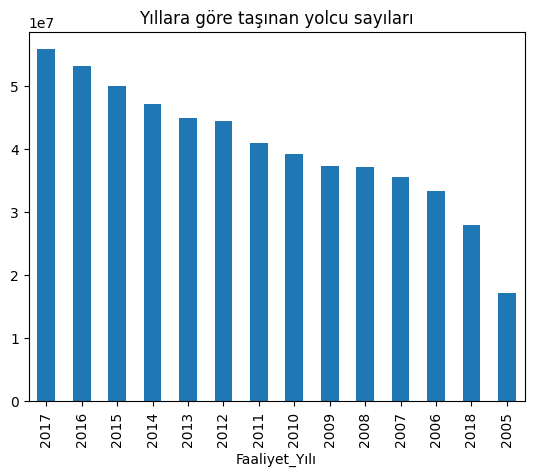

In [38]:
yıllaragore.plot.bar()
plt.title("Yıllara göre taşınan yolcu sayıları");

### Yellow Brick

In [39]:
from yellowbrick.cluster import KElbowVisualizer

In [40]:
model=KMeans()

In [41]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

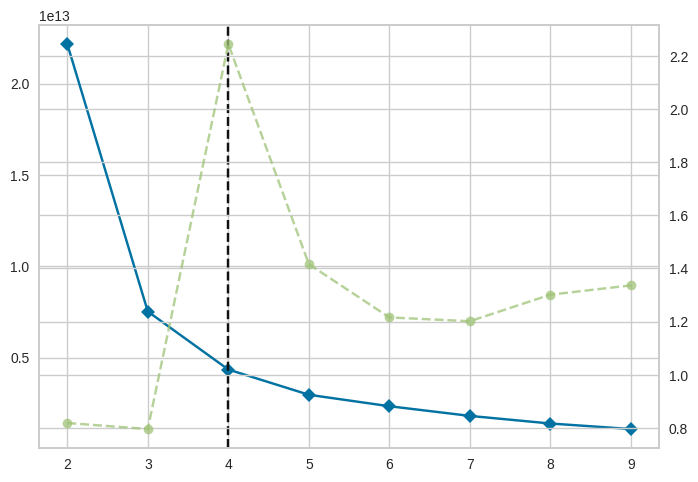

In [42]:
visualizer.fit(x)

In [43]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>